## Plotting the available atlas files 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import os 
import glob
import sys

import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams["image.origin"] = 'lower'
plt.rcParams['font.family'] = "serif"
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

## Get all of the atlases filenames 

In [3]:
files       = np.array(glob.glob('./atlases/*PWV*npy'))
pwv        = np.array([ f.split('PWV')[1].split('_')[1] for f in files] ).astype(float)
airmass    = np.array([ f.split('Airmass')[1].split('_')[1] for f in files] ).astype(float)
## sort by pwv - water
files      = files[np.argsort(pwv)]
pwv        = np.array([ f.split('PWV')[1].split('_')[1] for f in files] ).astype(float)
airmass    = np.array([ f.split('Airmass')[1].split('_')[1] for f in files] ).astype(float)

In [4]:
wvair = np.load(glob.glob('./atlases/*wv_air_angstrom*')[0])
print(wvair.shape)

(2659263,)


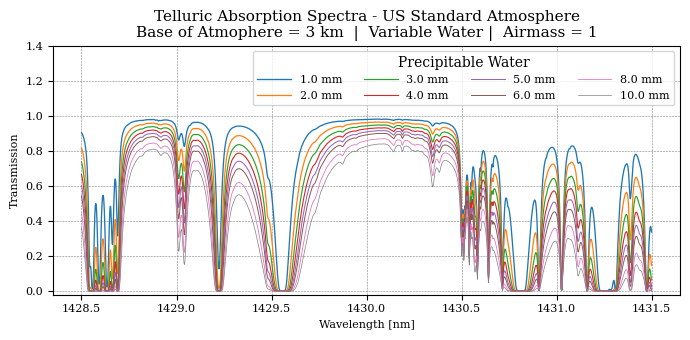

In [4]:
## Wavelength range in angstrom to plot
wvMin,wvMax = 14300-15,14300+15
plt.figure(figsize = (7,3.5))

for n in range(len(files)): 
    if airmass[n] == 1: 
        trans = np.load(files[n])
        ww = (wvair>wvMin)*(wvair<wvMax)
        plt.plot(wvair[ww]/10.,trans[ww],label = str(pwv[n]) + ' mm',lw = 1 - pwv[n]/20.)
        
plt.title('Telluric Absorption Spectra - US Standard Atmosphere\nBase of Atmophere = 3 km  |  Variable Water |  Airmass = 1',fontsize =11)
plt.ylabel("Transmission")
plt.legend(ncol = 4,loc = 'upper right',fontsize = 8,handlelength = 3 ,title = 'Precipitable Water')
plt.ylim(-0.02,1.4)
plt.grid(ls = 'dashed',lw = 0.4,color = 'grey')
plt.xlabel("Wavelength [nm]")
plt.tight_layout()
plt.savefig('telluric_spectra_1430nm.png',dpi = 600)

## A full atlas at nominal 3 mm water and 1 airmass 

In [5]:
# Find file with 3 mm of precipitable water and 1 airmass 
ww = (pwv == 3) * (airmass== 1) 
file_std = files[ww][0]
print(file_std)

./atlases/telluric_atlas_mainMol_USstd_CO2_416ppm-Base_3km-PWV_3__mm-Airmass_1___v20240307.npy


In [6]:
trans = np.load(file_std)

In [7]:
nax = 10
wvRange = wvair.max()-wvair.min()
dwv = wvRange/nax
wv0s = np.arange(nax)*wvRange / nax + wvair.min()

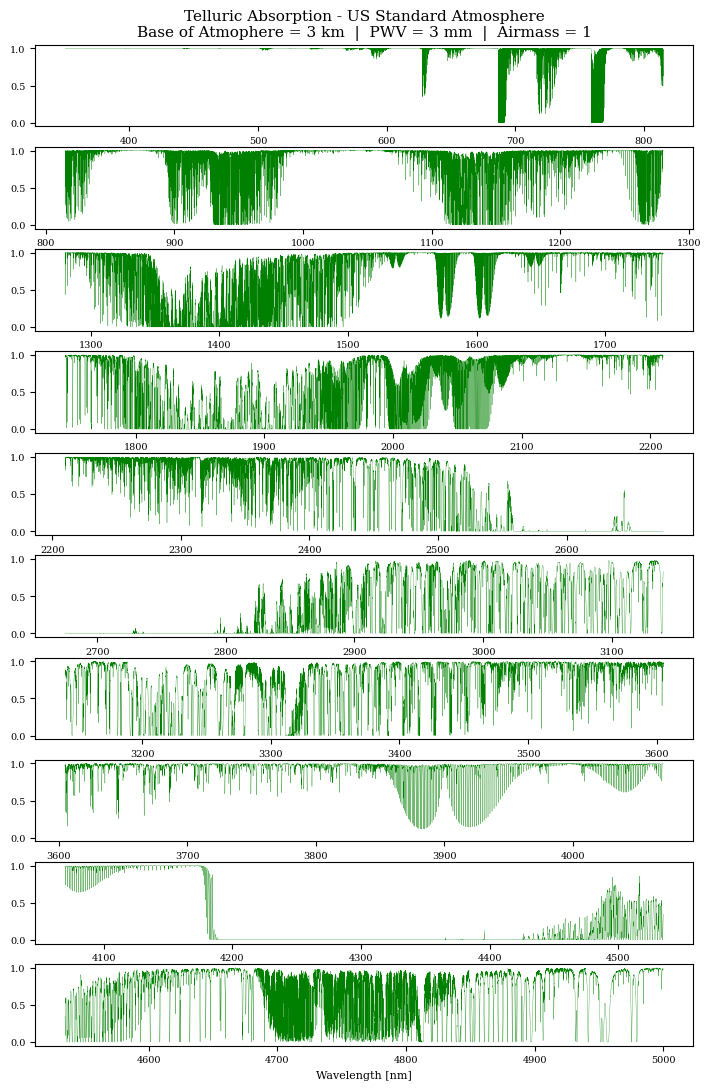

In [8]:
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
fig,ax = plt.subplots(nax,1,figsize = (7,11),sharey=True)
ax = ax.flatten()
for n in range(nax): 
    ww = (wvair >= wv0s[n]) * (wvair <= wv0s[n] + dwv)
    ax[n].plot(wvair[ww]/10.,trans[ww],lw = 0.2,color = 'green')
ax[0].set_title('Telluric Absorption - US Standard Atmosphere\nBase of Atmophere = 3 km  |  PWV = 3 mm  |  Airmass = 1',fontsize =11)
ax[-1].set_xlabel("Wavelength [nm]")
fig.subplots_adjust(0.04,0.04,0.98,0.95,hspace = 0.25)
plt.savefig('telluric_spectra_vis_ir_3mm_1airmass.png',dpi = 600)